In [1]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Orders.csv')

In [3]:
df.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [4]:
df.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [5]:
df.describe()

,Row.ID,Postal.Code,Quantity,Discount,Shipping.Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,3.476545,0.142908,26.478567
std,14806.29199,32063.693350,2.278766,0.212280,57.251373
min,1.00000,1040.000000,1.000000,0.000000,1.002000
25%,12823.25000,23223.000000,2.000000,0.000000,2.610000
50%,25645.50000,56430.500000,3.000000,0.000000,7.790000
75%,38467.75000,90008.000000,5.000000,0.200000,24.450000
max,51290.00000,99301.000000,14.000000,0.850000,933.570000


In [6]:
df.isnull().sum()

Row.ID                0
Order.ID              0
Order.Date            0
Ship.Date             0
Ship.Mode             0
Customer.ID           0
Customer.Name         0
Segment               0
Postal.Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product.ID            0
Category              0
Sub.Category          0
Product.Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping.Cost         0
Order.Priority        0
dtype: int64

In [7]:
df['Profit'] = df.Profit.str.replace('$', '')
df['Profit'] = df.Profit.str.replace(',', '')
df['Profit'] = df['Profit'].apply(lambda x: float(x))
df['Sales'] = df.Sales.str.replace('$', '')
df['Sales'] = df.Sales.str.replace(',', '')
df['Sales'] = df['Sales'].apply(lambda x: float(x))

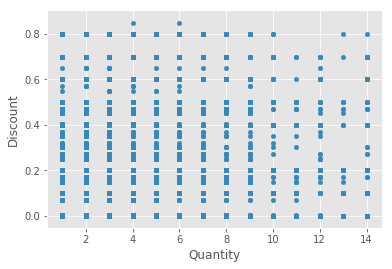

In [8]:
import seaborn as sns
df.plot.scatter(x='Quantity', y='Discount')

/Users/sunandamishra/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sunandamishra/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


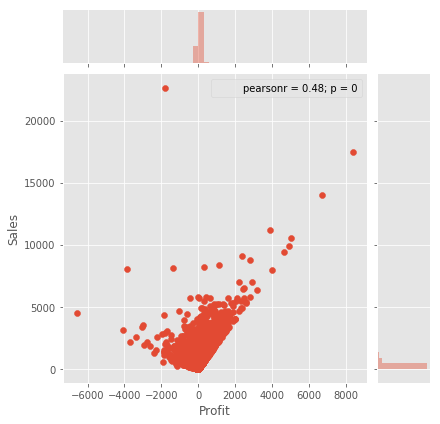

In [9]:
#df.plot.scatter(x='Profit', y='Sales', col = 'Discount')
sns.jointplot(df['Profit'], df['Sales'])

/Users/sunandamishra/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


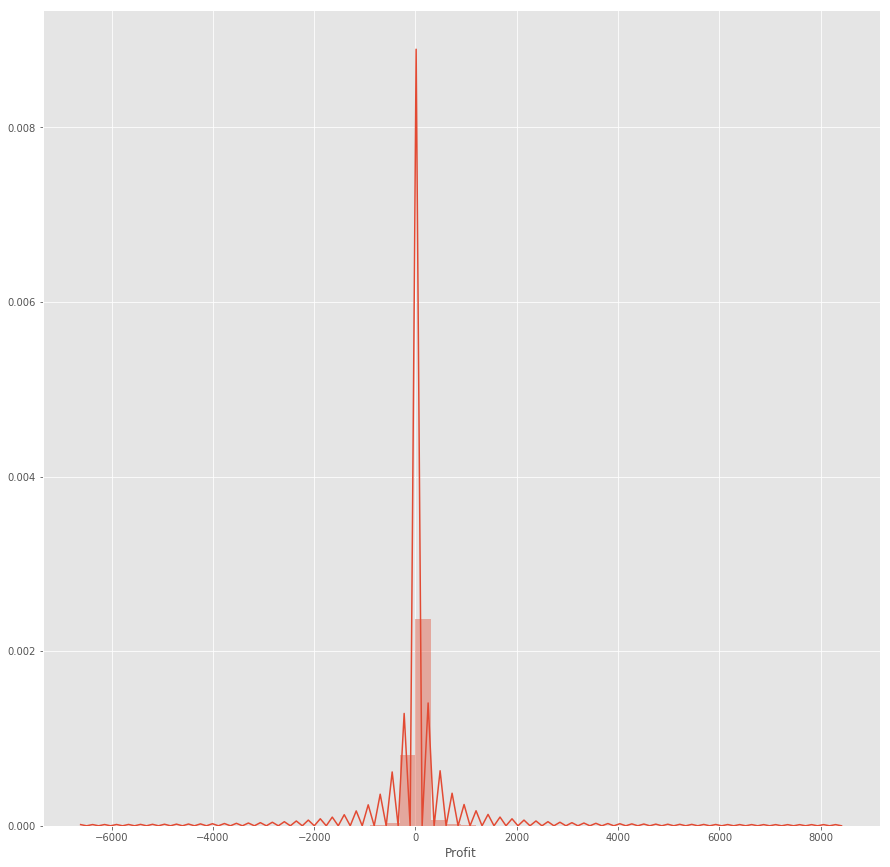

In [10]:
figure = plt.figure(figsize=(15, 15))
sns.distplot(df['Profit'])

In [11]:
import datetime
#df['Order.Date'] = list(map(lambda x: x.))
#datetime.df['Order.Date'][0]
df['date'] = pd.to_datetime(df['Order.Date'])
df['order.month'] = pd.DatetimeIndex(df['date']).month

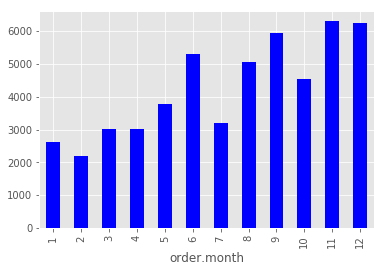

In [12]:
df.groupby('order.month')['Product.ID'].count().plot.bar(color='b')

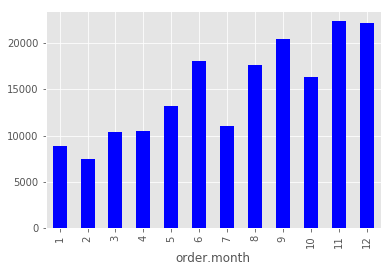

In [13]:
df.groupby('order.month')['Quantity'].sum().plot.bar(color='b')

In [14]:
from datetime import date, datetime
Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [('winter', (date(Y,  1,  1),  date(Y,  3, 20))),
          ('spring', (date(Y,  3, 21),  date(Y,  6, 20))),
          ('summer', (date(Y,  6, 21),  date(Y,  9, 22))),
          ('autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
          ('winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(now):
   if isinstance(now, datetime):
       now = now.date()
   now = now.replace(year=Y)
   return next(season for season, (start, end) in seasons
               if start <= now <= end)

df['order.season'] = df['date'].apply(lambda x: get_season(x))

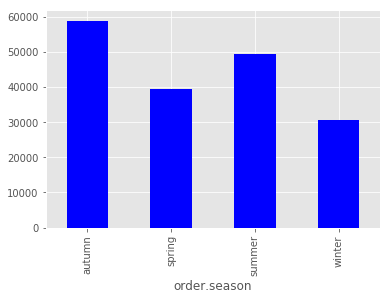

In [15]:
df.groupby('order.season')['Quantity'].sum().plot.bar(color='b')

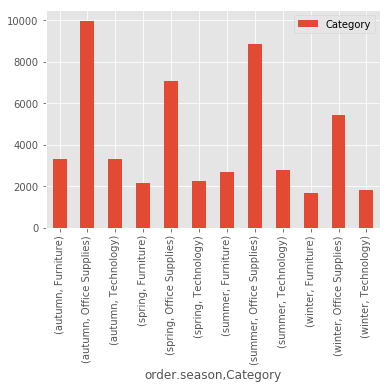

In [16]:
#df2 = df['order.season','Category']
df.groupby(['order.season','Category'])[['Category']].count().plot.bar()

In [17]:
df2 = pd.read_csv('Returns.csv')

In [18]:
df2.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [19]:
#df.columns
df3 = pd.merge(df, df2, left_on = 'Order.ID', right_on ='Order ID')

In [20]:
df3.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Discount,Profit,Shipping.Cost,Order.Priority,date,order.month,order.season,Returned,Order ID,Region_y
0,30191,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,0.0,720.36,725.57,Critical,2012-12-16,12,autumn,Yes,IN-2012-PB19210127-41259,Eastern Asia
1,30190,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,0.0,153.75,627.27,Critical,2012-12-16,12,autumn,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,30187,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,0.0,311.85,458.97,Critical,2012-12-16,12,autumn,Yes,IN-2012-PB19210127-41259,Eastern Asia
3,30193,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,0.0,114.60,203.92,Critical,2012-12-16,12,autumn,Yes,IN-2012-PB19210127-41259,Eastern Asia
4,30189,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,0.0,68.22,25.48,Critical,2012-12-16,12,autumn,Yes,IN-2012-PB19210127-41259,Eastern Asia


In [21]:
df3.groupby(['Returned'])[['Category']].count()

,Category
Returned,
Yes,2220


In [22]:
df3.groupby(['Returned'])[['Profit']].sum()

,Profit
Returned,
Yes,61370.75


In [23]:
df3['Year'] = pd.DatetimeIndex(df3['date']).year

In [24]:
df3.groupby(['Year'])[['Profit']].sum()

,Profit
Year,
2012,17477.26
2013,9269.89
2014,17510.63
2015,17112.97


In [25]:
df4 = df3.groupby(['Customer.ID'])[['Row.ID']].count()
df4[df4['Row.ID'] > 1].count()
# 547 customers had more than 1 return

Row.ID    547
dtype: int64

In [26]:
df4[df4['Row.ID'] > 5].count()
# 46 customers have more than 5 returns

Row.ID    46
dtype: int64

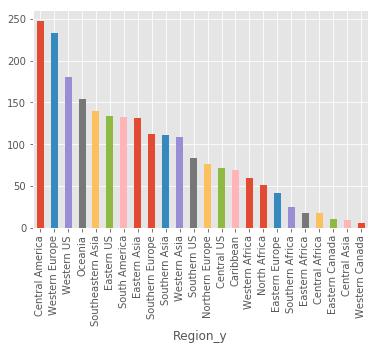

In [27]:
df3.groupby('Region_y')['Region_y'].count().sort_values(ascending=False).plot.bar()
#Central America most likely to return

Sub.Category
Accessories    138
Appliances      59
Art            217
Binders        269
Bookcases      104
Chairs         147
Copiers         99
Envelopes       99
Fasteners      102
Furnishings    135
Labels         137
Machines        63
Paper          150
Phones         145
Storage        212
Supplies       103
Tables          41
Name: Sub.Category, dtype: int64

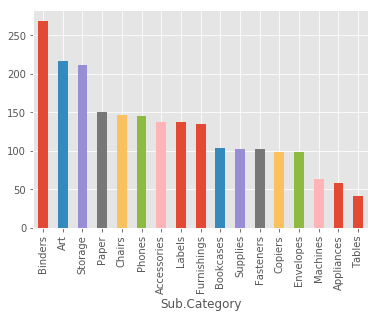

In [28]:
df3.groupby('Sub.Category')['Sub.Category'].count().sort_values(ascending=False).plot.bar()
df3.groupby('Sub.Category')['Sub.Category'].count()
#Binders are most likely subcategory to be returned
#df3.columns

In [29]:
with_returns = pd.merge(df, df2, left_on = 'Order.ID', right_on ='Order ID', how = 'outer')
with_returns.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Discount,Profit,Shipping.Cost,Order.Priority,date,order.month,order.season,Returned,Order ID,Region_y
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,0.0,62.15,40.77,High,2014-11-11,11,autumn,NaN,NaN,NaN
1,40099,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,0.0,54.71,25.27,High,2014-11-11,11,autumn,NaN,NaN,NaN
2,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,0.1,-288.77,923.63,Critical,2014-02-05,2,winter,NaN,NaN,NaN
3,26339,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,0.1,34.42,65.35,Critical,2014-02-05,2,winter,NaN,NaN,NaN
4,26340,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,0.1,-6.03,41.64,Critical,2014-02-05,2,winter,NaN,NaN,NaN


In [30]:
with_returns['Returned'] = with_returns['Returned'].fillna('No')
with_returns['Returned'] = pd.get_dummies(with_returns['Returned'], drop_first=True, dummy_na=True)
with_returns.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Discount,Profit,Shipping.Cost,Order.Priority,date,order.month,order.season,Returned,Order ID,Region_y
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,0.0,62.15,40.77,High,2014-11-11,11,autumn,0,NaN,NaN
1,40099,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,0.0,54.71,25.27,High,2014-11-11,11,autumn,0,NaN,NaN
2,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,0.1,-288.77,923.63,Critical,2014-02-05,2,winter,0,NaN,NaN
3,26339,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,0.1,34.42,65.35,Critical,2014-02-05,2,winter,0,NaN,NaN
4,26340,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,0.1,-6.03,41.64,Critical,2014-02-05,2,winter,0,NaN,NaN


In [31]:
with_returns['Order.Date'] = pd.to_datetime(with_returns['Order.Date'])
with_returns['Ship.Date'] = pd.to_datetime(with_returns['Ship.Date'])
with_returns['Process.Time'] = with_returns['Ship.Date'] - with_returns['Order.Date']
with_returns.head(10)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Profit,Shipping.Cost,Order.Priority,date,order.month,order.season,Returned,Order ID,Region_y,Process.Time
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,62.15,40.77,High,2014-11-11,11,autumn,0,NaN,NaN,2 days
1,40099,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,54.71,25.27,High,2014-11-11,11,autumn,0,NaN,NaN,2 days
2,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,-288.77,923.63,Critical,2014-02-05,2,winter,0,NaN,NaN,2 days
3,26339,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,34.42,65.35,Critical,2014-02-05,2,winter,0,NaN,NaN,2 days
4,26340,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,-6.03,41.64,Critical,2014-02-05,2,winter,0,NaN,NaN,2 days
5,26342,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,25.13,10.48,Critical,2014-02-05,2,winter,0,NaN,NaN,2 days
6,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,919.97,915.49,Medium,2014-10-17,10,autumn,0,NaN,NaN,1 days
7,25334,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,88.80,71.02,Medium,2014-10-17,10,autumn,0,NaN,NaN,1 days
8,25333,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,22.03,5.98,Medium,2014-10-17,10,autumn,0,NaN,NaN,1 days
9,25331,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,-1.30,2.25,Medium,2014-10-17,10,autumn,0,NaN,NaN,1 days


In [32]:
times_returned = pd.DataFrame(with_returns.groupby('Product.ID')['Returned'].sum())
with_returns = pd.merge(with_returns, times_returned, left_on = 'Product.ID', right_on ='Product.ID', how = 'outer')
with_returns.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Shipping.Cost,Order.Priority,date,order.month,order.season,Returned_x,Order ID,Region_y,Process.Time,Returned_y
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,40.77,High,2014-11-11,11,autumn,0,NaN,NaN,2 days,0
1,36383,CA-2013-KN16390140-41338,2013-03-05,2013-03-09,Standard Class,KN-163901406,Katherine Nockton,Corporate,19120.0,Philadelphia,...,32.98,Medium,2013-03-05,3,winter,0,NaN,NaN,4 days,0
2,40099,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,25.27,High,2014-11-11,11,autumn,0,NaN,NaN,2 days,0
3,39335,CA-2015-JC15775140-42186,2015-07-01,2015-07-03,Second Class,JC-157751404,John Castell,Consumer,90032.0,Los Angeles,...,52.12,High,2015-07-01,7,summer,0,NaN,NaN,2 days,0
4,33020,US-2013-KD16345140-41628,2013-12-20,2013-12-25,Standard Class,KD-163451402,Katherine Ducich,Consumer,60623.0,Chicago,...,22.18,Medium,2013-12-20,12,autumn,0,NaN,NaN,5 days,0


In [33]:
with_returns = with_returns.rename(columns={'Returned_x': 'Returned', 'Returned_y': 'Times.Returned'})

In [34]:
with_returns.shape

(51290, 32)

In [45]:
print(with_returns['Ship.Mode'].unique())
print(with_returns['Order.Priority'].unique())

['First Class' 'Standard Class' 'Second Class' 'Same Day']
['High' 'Medium' 'Critical' 'Low']


In [49]:
ord_ship_mode = {'Same Day': 1, 'First Class': 2, 'Second Class': 3, 'Standard Class':4}
ord_priority = {'Critical':1, 'High':2, 'Medium': 3, 'Low':4}

In [37]:
#useless_features=['Row.ID','Ship.Date','Order.Date','Order ID','Region_y','Product.Name','Customer.Name', 'date']

#with_returns2 = with_returns.drop(useless_features,axis=1).columns

In [38]:
#temp = pd.DataFrame(train.drop(useless_features).columns)
#type(temp)
#temp.columns
#test.head()

In [51]:
with_returns['ord_ship_mode'] = with_returns['ord_ship_mode'].map(lambda x: ord_ship_mode.get(x, 0))
with_returns['ord_priority'] = with_returns['ord_priority'].map(lambda x: ord_priority.get(x, 0))

KeyError: 'ord_priority'

In [39]:
#from LabelClass import LabelCountEncoder

In [40]:
#label_count_df = with_returns

#for c in label_count_df.columns:
#    if label_count_df[c].dtype == 'object':
#        lce = LabelCountEncoder()
#        label_count_df[c] = lce.fit_transform(label_count_df[c])

In [41]:
#label_count_df.head()

In [42]:
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(with_returns, test_size=0.2,stratify=with_returns.Returned)
# print(len(train)/len(with_returns))
# print(len(test)/len(with_returns))
# print(sum(train.Returned))
# print(sum(test.Returned))